Function to check if a given function is linear or not

In [ ]:
import random

def is_linear(f):
    a, b, x, y = [random.uniform(-10, 10) for _ in range(4)]

    # Check linearity
    left_side = f(a * x + b * y)
    right_side = a * f(x) + b * f(y)

    return left_side == right_side

# Example function f(x) = 2*x
def example_function(x):
    return 2 * x

# Test if the example function is linear
result = is_linear(example_function)

if result:
    print("The function is linear.")
else:
    print("The function is not linear.")


The function is linear.


This is a good start but isn't as accurate. We will run the function for multiple test cases (that is why the num_tests is used) because one random case being equal doesnt guarantee that the function is linear for example f(x) = x^2 will be considered linear for a  = 1 , b = 1 , x = 1 and y = 0 but it is not

In [ ]:
import random
def is_linear(f, a, b, num_tests=1000):
    for _ in range(num_tests):
        x = random.uniform(-100.00, 100.00)  # adjust the range of x as needed
        y = random.uniform(-100.00, 100.00)  # adjust the range of y as needed
        left_side = f(a * x + b * y)
        right_side = a * f(x) + b * f(y)

        # Check for equality to determine linearity
        if left_side == right_side:
            return True

    return False

# Example function f(x) = x^3
def function_to_test(x):
    return 1/pow(x,2)

# Test if the example function is linear with random values for a and b
a = random.uniform(-5, 5)
b = random.uniform(-5, 5)

result = is_linear(function_to_test, a, b)

if result:
    print("The function is linear.")
else:
    print("The function is not linear.")


The function is not linear.


#Where and how is this used?
Now coming to the real world. Using Machine learning we can approximate a linear function from a non linear function. How?
There is an algorithm for it called linear regression.
 If the function is not linear, you can use linear regression to find the closest linear approximation. Linear regression is a statistical method that models the relationship between two variables by fitting a linear equation to the observed data.

In simple words:

non linear function -> using linear regression -> approximate linear function

The below code uses our existing code but now if the function is determined to be non-linear, the program generates random data points and uses linear regression to find the closest linear function to the original non-linear one. The coefficients of the linear function are printed, and both the original non-linear function and the closest linear function are plotted using Matplotlib for visualization.
This is just for a better understanding and visualization of what we are doing, you don't need to understand each and every line of code!

The function is not linear. Finding the closest linear function.
Linear Function: f(x) = 5576.72 * x + -10349.59


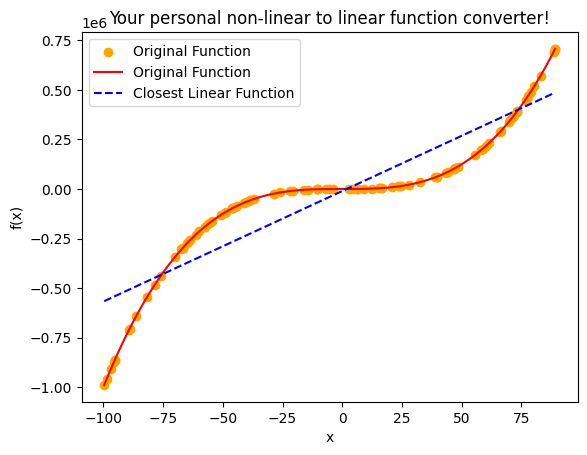

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

def is_linear(f, a, b, num_tests=1000):
    for _ in range(num_tests):
        x = random.uniform(-100.00, 100.00)
        y = random.uniform(-100.00, 100.00)
        left_side = f(a * x + b * y)
        right_side = a * f(x) + b * f(y)

        # Check for equality to determine linearity
        if left_side == right_side:
            return True

    return False

def find_closest_linear_function(x_values, y_values):
    # Use numpy's polyfit to perform linear regression
    coefficients = np.polyfit(x_values, y_values, 1)

    #inner function because we want to use these coefficients to make our linear function
    def linear_function(x):
        return coefficients[0] * x + coefficients[1]

    return linear_function, coefficients

# Example function f(x) = x^3
def function_to_test(x):
    return pow(x, 3)

a = random.uniform(-5, 5)
b = random.uniform(-5, 5)

result = is_linear(function_to_test, a, b)

if result:
    print("The function is linear.")
else:
    print("The function is not linear. Finding the closest linear function.")

    x_values = np.random.uniform(-100.00, 100.00, 100)
    y_values = np.array([function_to_test(x) for x in x_values])

    linear_function, coefficients = find_closest_linear_function(x_values, y_values)

    print(f"Linear Function: f(x) = {coefficients[0]:.2f} * x + {coefficients[1]:.2f}")

#plotting
    plt.scatter(x_values, y_values, color = "orange", label='Original Function')
    x_range = np.linspace(min(x_values), max(x_values), 100)
    plt.plot(x_range, function_to_test(x_range), color='r', label='Original Function')
    plt.plot(x_range, linear_function(x_range), color='b', linestyle='--', label='Closest Linear Function')
    plt.title('Your personal non-linear to linear function converter!')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.show()


#(Optional) Code explained : How did we perform linear regression using np polyfit

x_values and y_values are the input and output data points, respectively. The third argument, 1, specifies that we want to fit a polynomial of degree 1, which corresponds to a linear function (ax + b).

The numpy.polyfit function internally uses least squares to find the best fitting equation.
You can go through for reference if you would like to understand more about  Least Squares Regression Method:

https://medium.com/edureka/least-square-regression-40b59cca8ea7

After calling np.polyfit, the resulting coefficients variable contains the coefficients of the linear function. In the context of simple linear regression:

coefficients[0] is the slope 'a' of the linear function.
coefficients[1] is the y-intercept 'b' of the linear function.

So, by using np.polyfit, we find the best-fitting linear function for the given set of data points (x_values and y_values that we had calculated randomly from our non linear function).

So simply put we do this:

**non linear function -> random data points generated from the non linear function -> best fitting linear function for those data points**
